<a href="https://colab.research.google.com/github/ShaimaM/Intro_to_ML/blob/main/W3_D2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Members:
* Shaima Alamri 
* Nada Alzahrani



In [ ]:
# import the libraries 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

sns.set_palette("pastel")

<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
34,10,122,78,31,0,27.6,0.512,45,0
728,2,175,88,0,0,22.9,0.326,22,0
309,2,124,68,28,205,32.9,0.875,30,1


### **EDA**

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


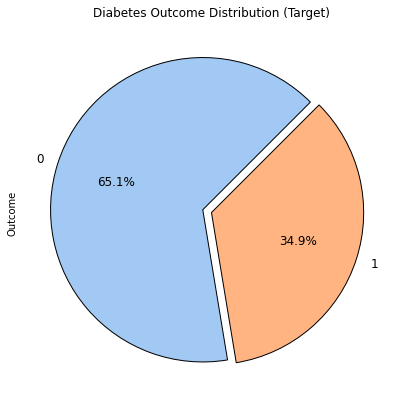

In [ ]:
# View Diabetes Outcome Distribution , 0= Doesn't have Diabetes / 1= Diabetes .
plt.figure(figsize=(7,7))
df.Outcome.value_counts().plot.pie(explode= (0.06 , 0.0), autopct='%1.1f%%', startangle=45 , textprops={'fontsize': 12} , 
   wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True}).set(title = 'Diabetes Outcome Distribution (Target)');

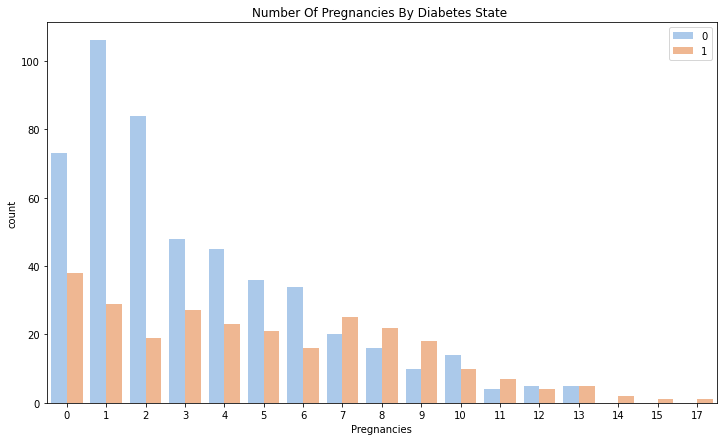

In [ ]:
#Number Of Pregnancies By Diabetes State, 0= Doesn't have Diabetes / 1= Diabetes .
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='Pregnancies',hue='Outcome').set(title="Number Of Pregnancies By Diabetes State ");
plt.legend(loc='upper right');

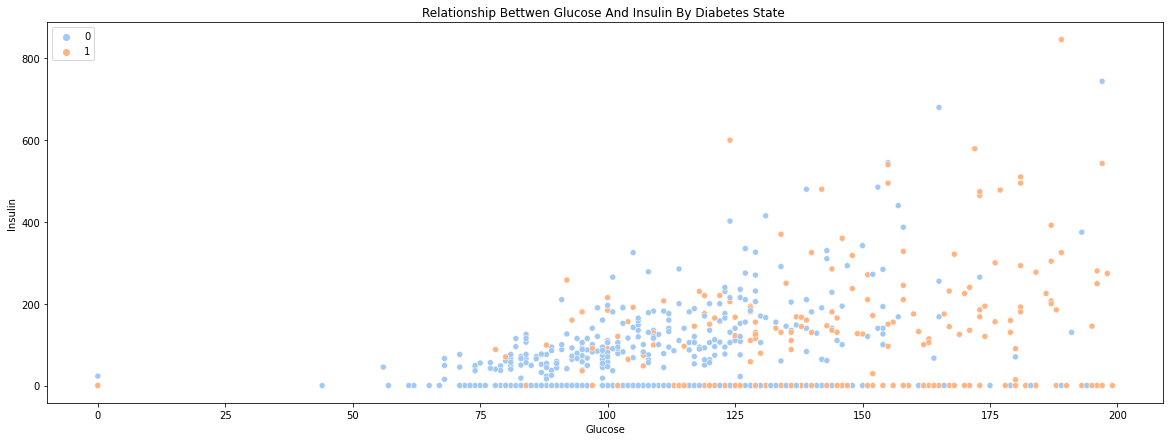

In [ ]:
#Relationship Between Glucose And Insulin, 0= Doesn't have Diabetes / 1= Diabetes .
plt.figure(figsize=(20,7))
sns.scatterplot(data=df, x="Glucose",y="Insulin",hue="Outcome").set(title='Relationship Bettwen Glucose And Insulin By Diabetes State ')
plt.legend(loc='upper left');

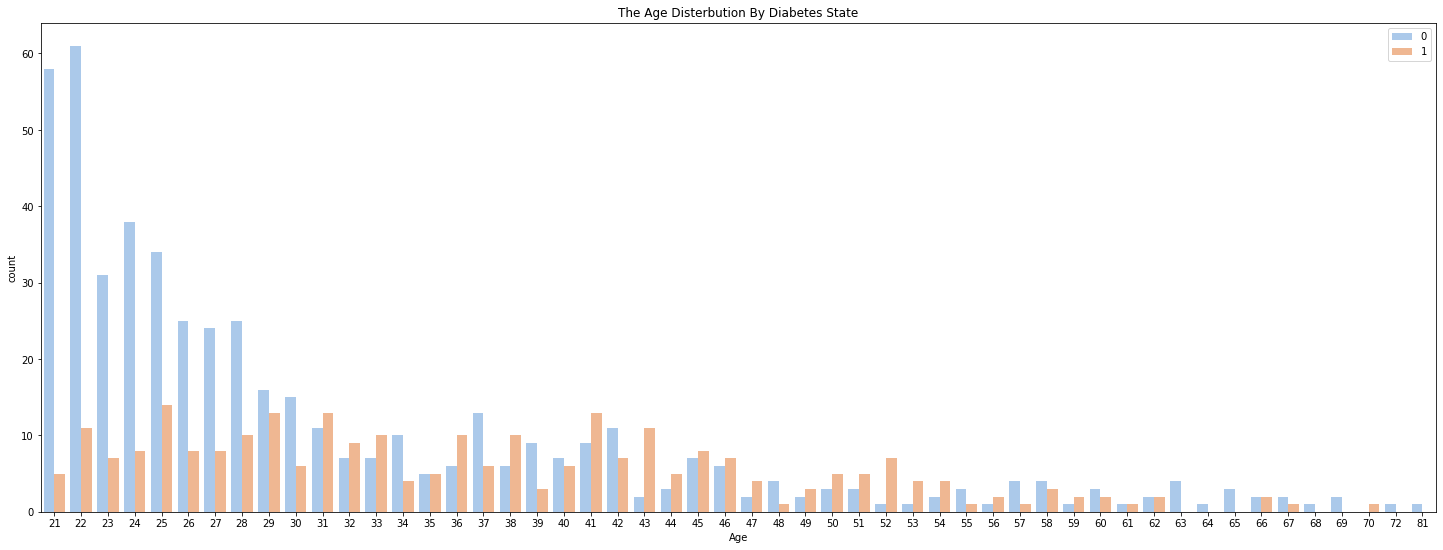

In [ ]:
# The Age Disterbution By Diabetes State , 0= Doesn't have Diabetes / 1= Diabetes .
plt.figure(figsize=(25,9))
sns.countplot(data=df,x="Age",hue="Outcome").set(title="The Age Disterbution By Diabetes State")
plt.legend(loc='upper right');

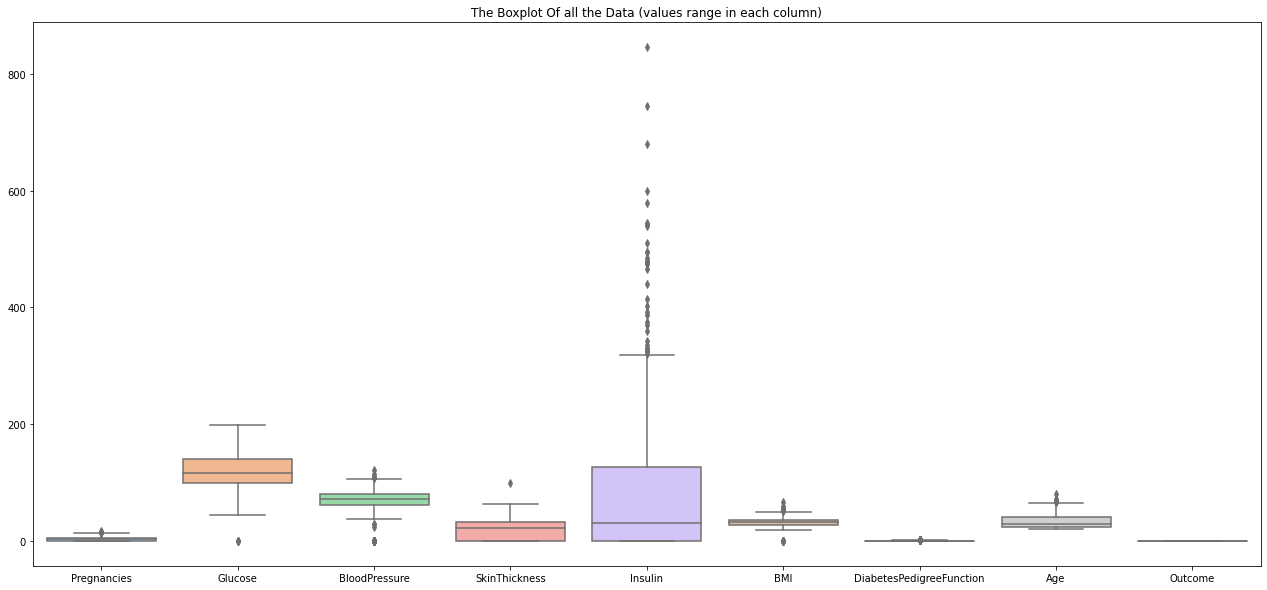

In [ ]:
# The Boxplot Of all the Data (values range in each column)
plt.figure(figsize=(22,10))
sns.boxplot(data = df).set(title="The Boxplot Of all the Data (values range in each column)");

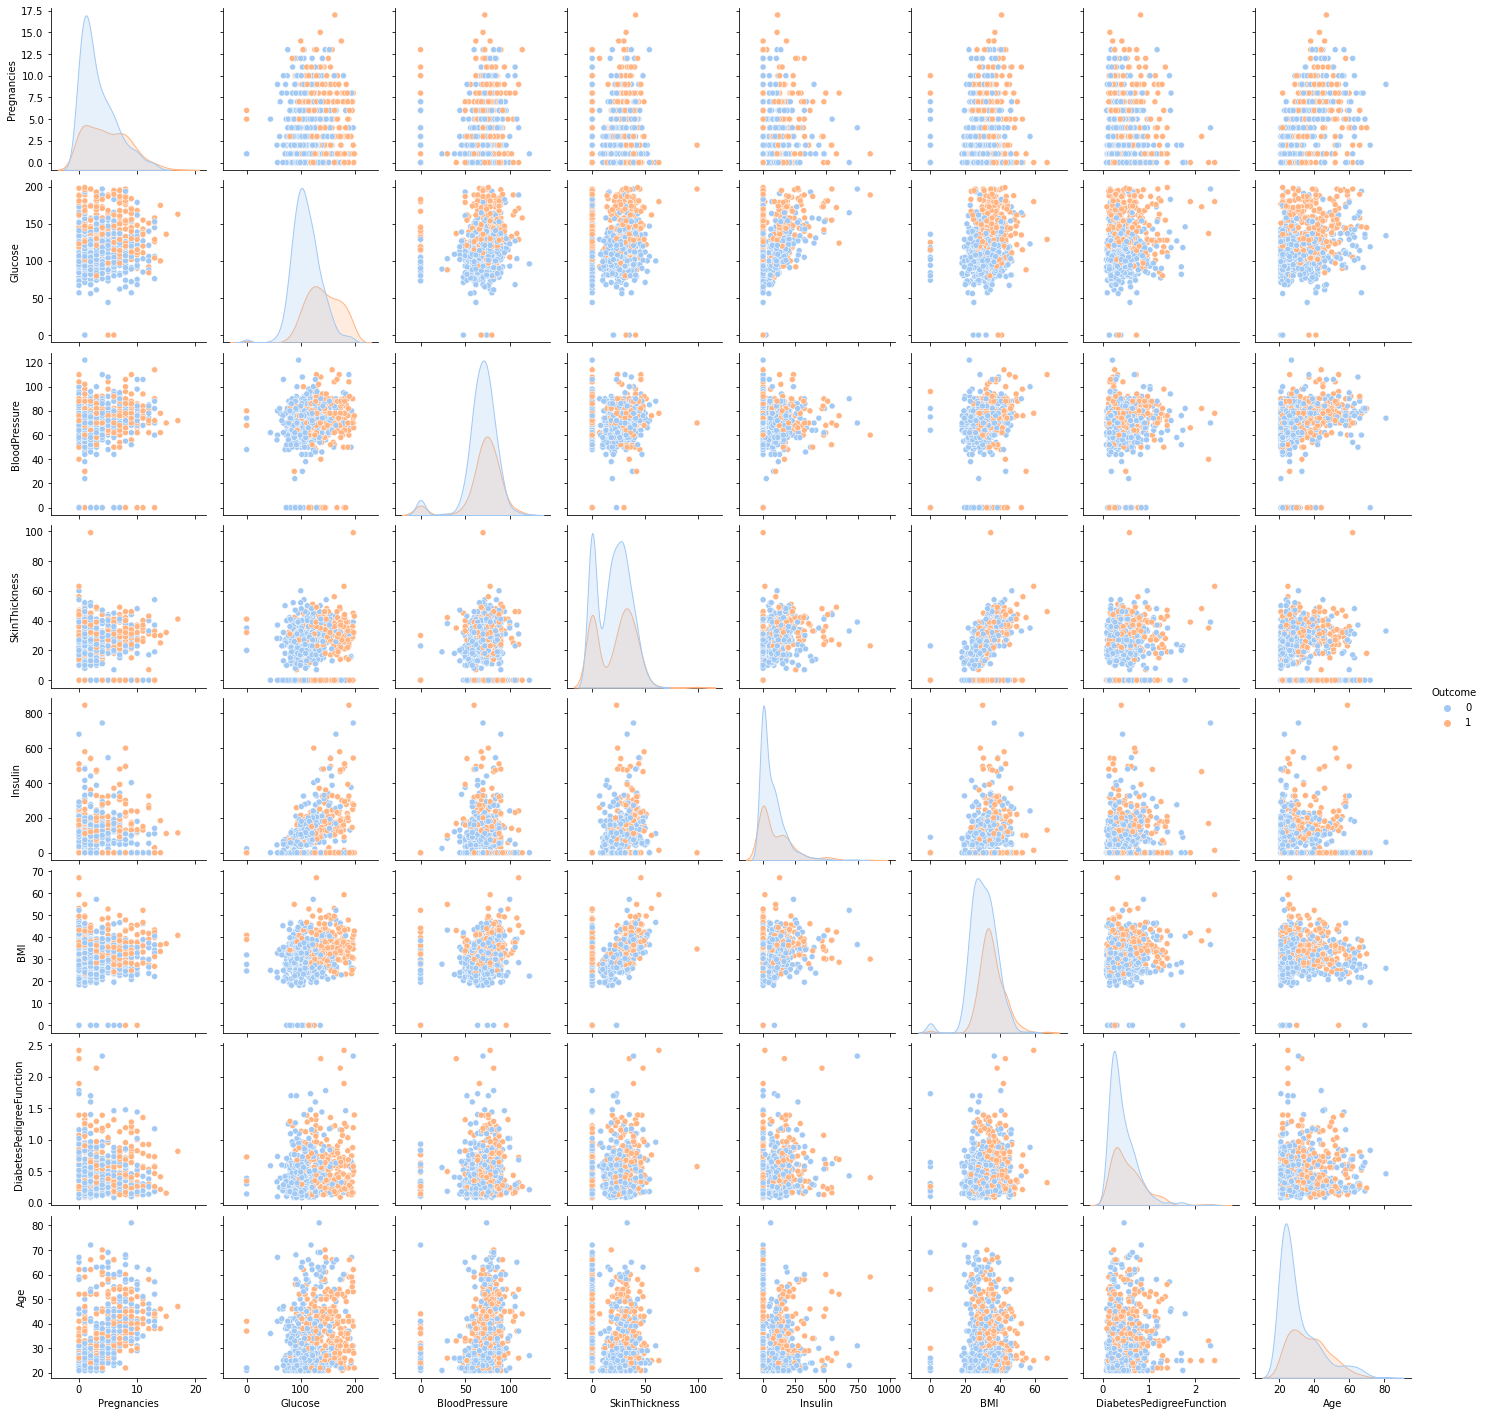

In [ ]:
#Pairplots of features:
sns.pairplot(df, hue='Outcome')
plt.show()

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='Blues')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### **Split Data**

In [ ]:
x=df.drop(['Outcome'],axis=1)
y=df.Outcome

# splitting into train and test sets for both parameters
x_train, x_test ,y_train , y_test = train_test_split(x,y, test_size=0.7, random_state= 42)

### **Determine Baseline Model**

In [ ]:
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    # list to save all the predicted values in
    baseline_preds = []
    for i in range(n_predictions): # loop through your training set size
        baseline_preds.append(value_to_predict) # predict the most common values for each row and store it in the list
    return pd.Series(baseline_preds) # return the predictions list as series

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class (0 = edible))

baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds # print all predicted values

0      0
1      0
2      0
3      0
4      0
      ..
533    0
534    0
535    0
536    0
537    0
Length: 538, dtype: int64

In [ ]:
acc_base=accuracy_score(y_test,baseline_preds)
acc_base

0.6486988847583643

### **Scale Data**

In [ ]:
scaler = StandardScaler()

x=df.drop(['Outcome'],axis=1)
y=df.Outcome
cols = x.columns  # save column names for later

# scale the x data
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=7)

### **Create Logistic Regression Model**

In [ ]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preds = lr.predict(x_test)

pd.Series(preds).value_counts()

0    165
1     66
dtype: int64

In [ ]:
acc_log=accuracy_score(y_test, preds)
acc_log

0.7748917748917749

### **Compare Results to Baseline**

In [ ]:
accuracies = pd.DataFrame()
accuracies['names'] = ['Baseline','Logistic']
accuracies['values'] = [acc_base , acc_log]

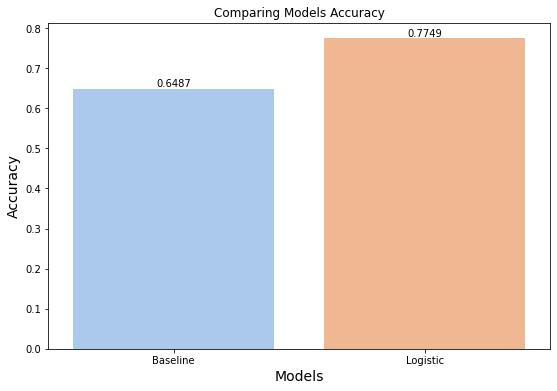

In [ ]:
plt.figure(figsize=(9, 6))
splot=sns.barplot(x="names",y="values",data=accuracies)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.title('Comparing Models Accuracy');

### **Perform PCA**

In [ ]:
pca = PCA()

In [ ]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([0.26040842, 0.21302308, 0.12167194, 0.11609205, 0.10019493,
       0.08351094, 0.05715338, 0.04794526])

### **Use Your Principal Components for a Logistic Regression Model**

In [ ]:
lr = LogisticRegression()

x_train = pca.fit_transform(x_train)

lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
x_test = pca.fit_transform(x_test)

preds = lr.predict(x_test)

In [ ]:
acc_pca=accuracy_score(y_test, preds)
acc_pca

0.5670995670995671

### **Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA**

In [ ]:
accuracies = pd.DataFrame()
accuracies['names'] = ['Baseline','Logistic','Logistic With PCA']
accuracies['values'] = [acc_base , acc_log , acc_pca]

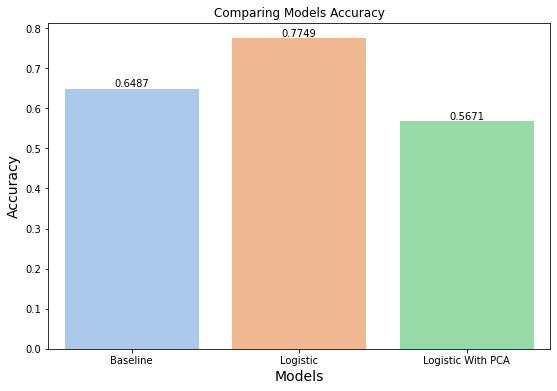

In [ ]:
plt.figure(figsize=(9, 6))
splot=sns.barplot(x="names",y="values",data=accuracies)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.title('Comparing Models Accuracy');

**The Normal Logistic Obtaiend a High Accuracy Than Baseline And Logistic With PCA , But The Logistic With PCA Obtaiend The Lowest Even More Than The Baseline Accuracy .**

✨BONUS✨

Create a Scree Plot (You will probably have to research this)

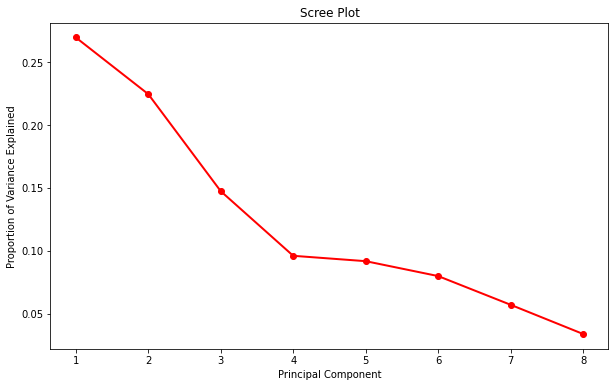

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(10, 6))
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained');

[Resource](https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis
)